In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [6]:
df['target'] = diabetes.target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [9]:
dum = DummyRegressor()

In [16]:
X = df.drop('target', axis = 1)

y = diabetes.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
dum.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
preds = dum.predict(X_train)
dum_rmse = np.sqrt(mean_squared_error(y_train, preds))
dum_rmse

76.99240989086773

In [20]:
dum.score(X_train, y_train)

0.0

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE: {}'.format(lr_rmse))

RMSE: 57.24981239828822


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

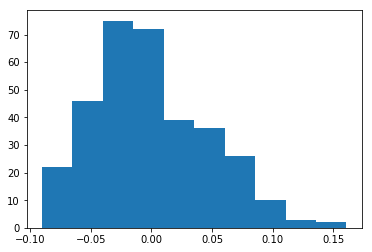

In [30]:
plt.hist(X_train[:, 2]);

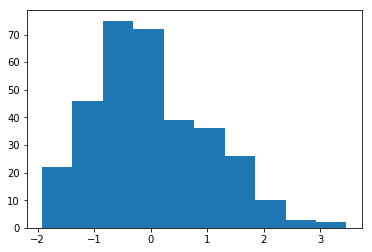

In [31]:
plt.hist(X_train_scaled[:, 2]);

In [32]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [34]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
preds = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Ridge RMSE: {}'.format(ridge_rmse))

Ridge RMSE: 57.30003148327706


In [54]:
alphas = np.logspace(0, 10, 100)
ridge_cv = RidgeCV(alphas=alphas, cv = 5)
ridge_cv.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000e+00, 1.26186e+00, ..., 7.92483e+09, 1.00000e+10]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [55]:
ridge_cv.alpha_

32.74549162877728

In [56]:
preds = ridge_cv.predict(X_test_scaled)
rmse_rcv = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: {}".format(rmse_rcv))

RMSE: 57.10305693698609


In [57]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
preds = lasso.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

57.00563293595151


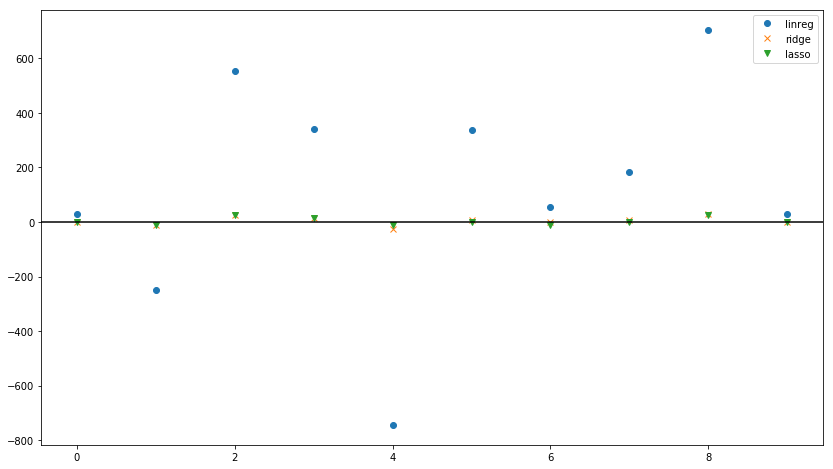

In [59]:
plt.figure(figsize = (14, 8))
plt.plot(lr.coef_, 'o', label = 'linreg')
plt.plot(ridge.coef_, 'x', label = 'ridge')
plt.plot(lasso.coef_, 'v', label = 'lasso')
plt.axhline(color = 'black')
plt.legend()